In [1]:
# Import MNIST dataset from pytorch
from torchvision import datasets, transforms
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Define data transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

def target_transform(target):
    new_target = torch.zeros(10)
    new_target[target] = 1
    return new_target

# Load MNIST train and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform,  target_transform=target_transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform,  target_transform=target_transform, download=True)

In [2]:
from CNN import CNN

model = CNN(input_size = [28,28], num_classes = 10, channels = 1, activation = 'relu')


losses, val_losses = model.train(data = train_dataset, 
                                epochs = 6, 
                                batch_size = 256, 
                                criterion = 'cross_entropy', 
                                optimizer = 'adam', 
                                lr = 0.01, 
                                reg = None, 
                                verbose = 1, 
                                output = True,
                                validation = 0.2)

Epoch 1 | Train Loss: 0.08911684900522232 | Validation Loss: 0.10289374796549479 | Time: 52.41s
Epoch 2 | Train Loss: 0.04962753504514694 | Validation Loss: 0.11037461344401042 | Time: 50.28s
Epoch 3 | Train Loss: 0.146662175655365 | Validation Loss: 0.07073875935872395 | Time: 47.83s
Epoch 4 | Train Loss: 0.006441231817007065 | Validation Loss: 0.07329411824544271 | Time: 50.89s


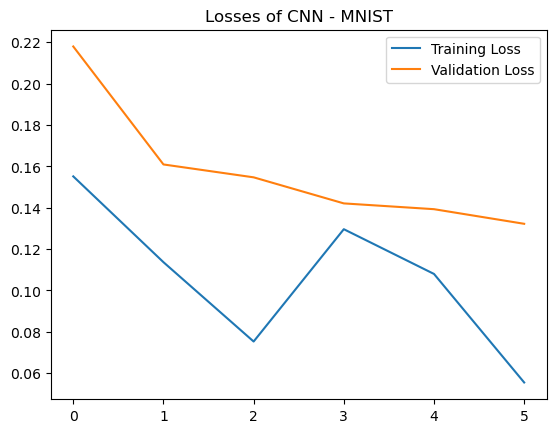

In [ ]:
plt.plot(losses, label = 'Training Loss')
plt.plot(val_losses, label = 'Validation Loss')
plt.title('Losses of CNN - MNIST')
plt.legend()
plt.show()

In [ ]:
# Test the model
correct = 0
total = len(test_dataset)
with torch.no_grad():
    for images, labels in test_dataset:
        images = images.reshape(-1, 1, 28, 28)
        outputs = F.softmax(model(images), dim = 1)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        _, labels = torch.max(labels, 0)
        correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))
    

Test Accuracy of the model on the 10000 test images: 96.76 %
